In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
!wget http://www.razer.net.br/datasets/spam.csv

df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df.head()


df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['labels', 'data']
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
y = df['b_labels'].values

--2025-08-20 22:08:44--  http://www.razer.net.br/datasets/spam.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [application/octet-stream]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  1.40MB/s    in 0.3s    

2025-08-20 22:08:44 (1.40 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.33)

In [ ]:
num_words = 20000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
word2index = tokenizer.word_index
V = len(word2index)
print("%s  tokens" % V)

7247  tokens


In [ ]:
data_train = pad_sequences(sequences_train)
T = data_train.shape[1]

data_test = pad_sequences(sequences_test, maxlen=T)

print('Shape of data train tensor:', data_train.shape)
print('Shape of data test tensor:', data_test.shape)

Shape of data train tensor: (3733, 121)
Shape of data test tensor: (1839, 121)


In [ ]:
D = 20
M = 5

i = Input(shape = (T, ))
x = Embedding(V + 1, D)(i)
x = LSTM(M)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 121)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 121, 20)        │       144,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,486 (568.30 KB)

 Trainable params: 145,486 (568.30 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

epochs = 5

r = model.fit(
    data_train, y_train,
    epochs=epochs,
    validation_data=(data_test, y_test))

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8174 - loss: 0.5920 - val_accuracy: 0.8989 - val_loss: 0.3468
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9449 - loss: 0.2838 - val_accuracy: 0.9652 - val_loss: 0.1797
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9843 - loss: 0.1450 - val_accuracy: 0.9826 - val_loss: 0.1203
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9948 - loss: 0.0895 - val_accuracy: 0.9869 - val_loss: 0.0892
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9959 - loss: 0.0633 - val_accuracy: 0.9880 - val_loss: 0.0760


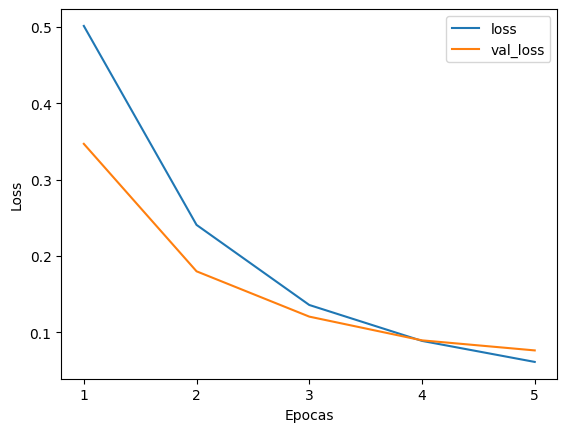

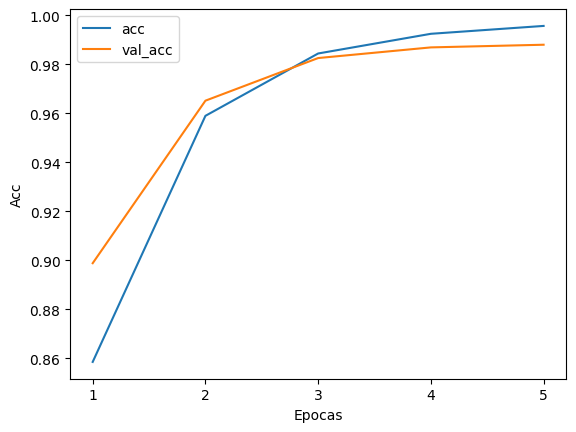

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel("Epocas")
plt.ylabel("Loss")
plt.xticks(np.arange(0, epochs, step=1), labels=range(1, epochs+1))
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.xlabel("Epocas")
plt.ylabel("Acc")
plt.xticks(np.arange(0, epochs, step=1), labels=range(1, epochs+1))
plt.legend()
plt.show()

In [ ]:
#texto = "Is your car dirty? Discover our new product. Free for all. Click the link."
texto = "HI!! Today is your lucky day. Fifty thousand dollars for your first access on tiger fortune! Click on the link bellow."
seq_texto = tokenizer.texts_to_sequences({texto})
data_texto = pad_sequences(seq_texto, maxlen=T)

pred = model.predict(data_texto)
print(pred)
print("SPAM" if pred >= 0.5 else "OK")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.6316769]]
SPAM
